Author: Ernest Mack

Comments: This could be done more elegently using other methods however, this is intended as a brute-force exercise using bare-bones coding to get the job done.

### This is a brute-force web scraper using python, requests and beautifulsoup to get the lifting done.

The skills developed use requests to to access the web site and get the html and then I use beautiful soup to parse the html tags for the data I want to mine then I convert the data to various lists from which pandas dataframes are created. Then I concatenate the dataframes to create a single dataframe with multiple columns of data. I know that was one heck of a run-on sentence. Anyway, as an exercise I then write-out the dataframe to a .CSV for sharing if I want. now I can focus on doing some data visualizations and manipulation.

### View the properly rendered verion here:

https://nbviewer.jupyter.org/github/SeriousHyena/Sandbox/blob/master/car_review_scraper.ipynb

In [81]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Use Python Requests to get connected to the site and get the html

In [4]:
r = requests.get('https://www.jdpower.com/Cars/Consumer-Reviews')

In [5]:
url = 'https://www.jdpower.com/Cars/Consumer-Reviews'
r = requests.get(url)
content = r.text

### Use BeautifulSoup to parse the html

https://www.crummy.com/software/BeautifulSoup/bs4/doc/


### First inspect the web page under consideration.

I do this by navigating out to the web page and then use the 'inspect element' feature of firefox. This allows me to determine the tag that references the data I am considering mining.

### Create a beuatifulsoup element to hold the parsed html

In [6]:
soup = BeautifulSoup(content, 'html.parser')

### Now start parsing the html

In [7]:
cars = soup.find_all('section', 'site-content')

### Iterate through the html tags.

### A function to iterate the various html tags

In [62]:
tag_item = [] #a list for the descriptions I will call this function as required based on the html
              #tags and the data I want to extract  
def get_tags(tag_name, tag_desc): 
    tag_item.clear() #clear the list contentas for re-use
    for paragraph in soup.find_all(tag_name,tag_desc):
        tag_item.append(str(paragraph.text))

    

### create lists to store the tag data I want to mine

In [63]:
get_tags('div', 'title heading-s')

In [64]:
#here I have to use the python copy() method otherwise I will not be able to save new list contents
car_name = tag_item.copy()

In [65]:
car_name[:5]

['2019 Mercedes-Benz GLC',
 '2019 Jeep Cherokee',
 '2019 Mercedes-Benz GLA',
 '2019 Chevrolet Tahoe',
 '2019 Audi Q7']

In [96]:
get_tags('div', 'heading-l')
rating = tag_item.copy()
rating[:10]

['4', '5', '5', '5', '5', '4', '5', '5', '4', '4']

In [114]:
rating[:5]

['4', '5', '5', '5', '5']

In [109]:
get_tags('div', 'review-body-text')
review = tag_item.copy()
review[:2]

['THE MERCEDES BENZ 2019 GLC IS VERY SMART. SOMETIMES IT IS A SMART ALEC!  SO MUCH TECHNOLOGY THAT IT IS DIFFICULT TO FEEL COMFORTABLE WITH ALL THE BELLS AND WHISTLES. BE PREPARED TO GET ALL THE LATEST IN TECHNOLOGY WHETHER YOU WANT IT OR NOT.',
 'Excellent, reliable vehicle that handles the road like a pro. Perfect road trip and everyday car for my growing family.']

### This section of code gets the owner verified review info

In [68]:
get_tags('div', 'author')
author = tag_item.copy()
author[:5]

['JILL B', 'Sarah', 'ROCHELLE', 'Anonymous', 'Anonymous']

In [69]:
get_tags('div', 'author-attributes-wrapper')
author_attrib = tag_item.copy()
author_attrib[:5]

['\nApr 02, 2019\n|\n500 miles\n|\nOwned 7 months\n',
 '\nApr 02, 2019\n',
 '\nApr 02, 2019\n|\n5,600 miles\n|\nOwned 11 months\n',
 '\nApr 02, 2019\n|\n9,000 miles\n|\nOwned 6 months\n',
 '\nApr 01, 2019\n']

### Remove unwanted characters from the author_attrib column and add a space after the | character

In [70]:
author_attrib = [i.replace('\n', '') for i in author_attrib]
author_attrib = [i.replace('|', ' ') for i in author_attrib]

In [71]:
author_attrib[:5] #verify my string cleaning worked

['Apr 02, 2019 500 miles Owned 7 months',
 'Apr 02, 2019',
 'Apr 02, 2019 5,600 miles Owned 11 months',
 'Apr 02, 2019 9,000 miles Owned 6 months',
 'Apr 01, 2019']

### Now create a Pandas dataframe

### First I will concatenate the multiple dataframes so I have the data in multiple rows.

I have concatenated several dataframes here so will be looking for a better way to do this however, this works fine but I think I could do a more elegant coding job.

In [77]:
df1 = pd.DataFrame(car_name)
df2 = pd.DataFrame(rating)
df_review = pd.DataFrame(review)
df_author = pd.DataFrame(author)
df_author_attrib = pd.DataFrame(author_attrib)

In [78]:
df3 = pd.concat([df1, df2, df_review, df_author, df_author_attrib], axis=1)

In [79]:
df3.columns = ['Car Name', 'Car Rating', 'Review', 'Author', 'Author Info']

In [117]:
df3.head()


,Car Name,Car Rating,Review,Author,Author Info
0,2019 Mercedes-Benz GLC,4,THE MERCEDES BENZ 2019 GLC IS VERY SMART. SOME...,JILL B,"Apr 02, 2019 500 miles Owned 7 months"
1,2019 Jeep Cherokee,5,"Excellent, reliable vehicle that handles the r...",Sarah,"Apr 02, 2019"
2,2019 Mercedes-Benz GLA,5,I LOVE THE WAY MY CAR ACCELARATES. I LOVE MY W...,ROCHELLE,"Apr 02, 2019 5,600 miles Owned 11 months"
3,2019 Chevrolet Tahoe,5,The Chevy Tahoe is very versatile. Seats lay ...,Anonymous,"Apr 02, 2019 9,000 miles Owned 6 months"
4,2019 Audi Q7,5,"Great vehicle, great performance. Very impres...",Anonymous,"Apr 01, 2019"


### We need to convert the rating values from str to int in order to properly plot the result in Matplotlib

In [132]:
df3['Car Rating'] = df3['Car Rating'].astype(int)

In [133]:
df3.isnull().sum()

Car Name       0
Car Rating     0
Review         0
Author         0
Author Info    0
dtype: int64

In [134]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
Car Name       20 non-null object
Car Rating     20 non-null int32
Review         20 non-null object
Author         20 non-null object
Author Info    20 non-null object
dtypes: int32(1), object(4)
memory usage: 848.0+ bytes


### Save the file to a .CSV for storage and sharing.

In [130]:
#this will show a file access error on github of course but does work locally as long as the file is not
#opened in excel.
df3.to_csv('car_reviews.csv')

### Next we can do some data visualization and manipulation

### Let's see the cars with the highest ratings

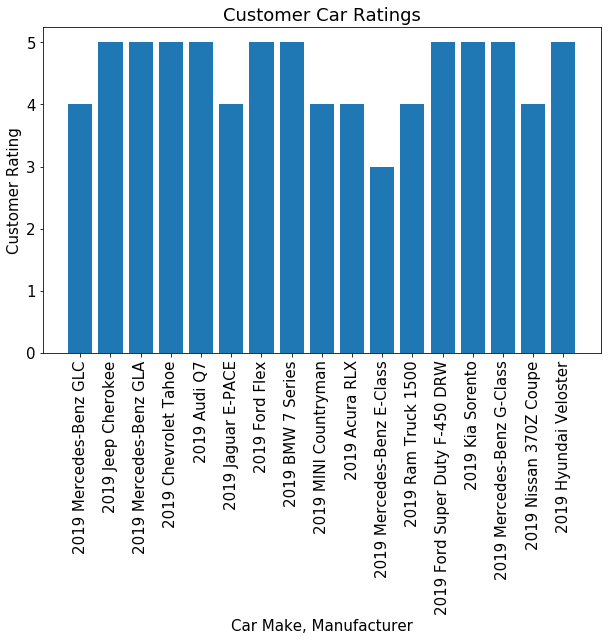

In [131]:
# Define plot space
fig, ax = plt.subplots(figsize=(10, 6))
plt.rcParams.update({'font.size': 15})

# Define x and y axes
ax.bar(df3['Car Name'], 
        df3['Car Rating'])
plt.xticks(rotation=90)

# Set plot title and axes labels
ax.set(title = "Customer Car Ratings",
       xlabel = "Car Make, Manufacturer",
       ylabel = "Customer Rating")

plt.show()